In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv("Bengaluru_House_data.csv")

In [6]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [8]:
df.shape

(13320, 9)

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bath,13247.0,2.692610,1.341458,1.0,2.0,2.0,3.0,40.0
balcony,12711.0,1.584376,0.817263,0.0,1.0,2.0,2.0,3.0
price,13320.0,112.565627,148.971674,8.0,50.0,72.0,120.0,3600.0


### Insights

1 The min no of batrooms is 1 & max is 40 while 2 is the mean no of bathrooms

2 The min no of price is 8 lakhs & max is 40L while 112 is the mean price


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [11]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

Text(0.5, 1.0, 'Top 5 Societies')

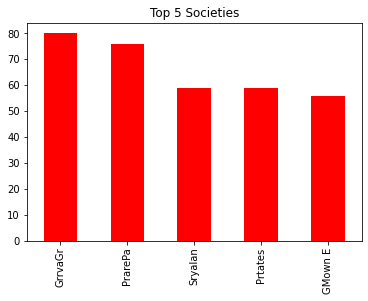

In [13]:
s = df['society'].value_counts().nlargest(5).plot(kind='bar', color='r')
plt.title("Top 5 Societies")

## Insights

1. GrrvaGr is the top society followed by prarepa

Text(0.5, 1.0, 'Top 5 Areas')

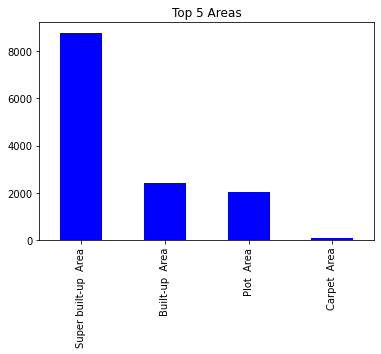

In [15]:
s = df['area_type'].value_counts().nlargest(5).plot(kind='bar', color='b')
plt.title("Top 5 Areas")

Top Area is Super built up area

In [16]:
## Filling Missing values
df['size'].fillna(value=df['size'].mode(), inplace=True)

# Fill missing values in the 'bath' column using forward fill method
df['bath'].fillna(method='ffill', inplace=True)
df['balcony'].fillna(method='ffill', inplace=True)
# Drop columns 'society' and 'availability'
df = df.drop(columns=['society', 'availability','location'])

# Convert 'total_sqft' to float64
df['total_sqft'] = pd.to_numeric(df['total_sqft'], errors='coerce')

In [17]:
df.isnull().sum()

area_type       0
size           16
total_sqft    247
bath            0
balcony         0
price           0
dtype: int64

In [18]:
df.dropna(inplace=True)

In [20]:
df['size'].value_counts()

2 BHK         5148
3 BHK         4254
4 Bedroom      811
4 BHK          546
3 Bedroom      542
1 BHK          492
2 Bedroom      325
5 Bedroom      294
6 Bedroom      190
1 Bedroom      100
7 Bedroom       83
8 Bedroom       83
5 BHK           55
9 Bedroom       45
6 BHK           30
7 BHK           17
1 RK            12
10 Bedroom      12
9 BHK            7
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [21]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

Text(0.5, 1.0, 'Scatter Plot of total_sqft')

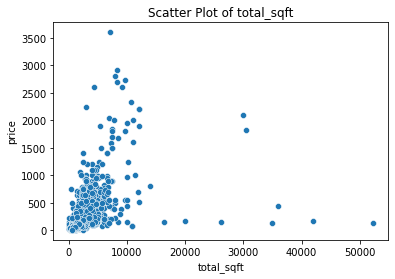

In [22]:
sns.scatterplot(x='total_sqft', y='price', data=df)  
plt.title('Scatter Plot of total_sqft')

 There is linear relation ship between total_sqft & price

In [27]:
df.drop(columns='area_type', inplace=True)

In [28]:
df.drop(columns='size', inplace=True)

In [24]:
df['sqft_price']=df['total_sqft']*df['price']

In [32]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [30]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

## Model Training


In [31]:
X = df.drop(['price'],axis='columns')
y = df.price

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [34]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [35]:
svm=SVR()

In [36]:
svm.fit(X_train,y_train)

SVR()

In [37]:
svm.score(X_train,y_train)

0.4450182569918787

In [ ]:
svm.score(X_test,y_test)

In [39]:
y_pred=svm.predict(X_test)

In [40]:
y_pred

array([ 77.34653138,  56.19134619, 290.2901442 , ...,  74.93066272,
        99.59607918,  53.3190803 ])

In [41]:
from sklearn.metrics import mean_squared_error ,mean_absolute_error,r2_score
acc = mean_absolute_error(y_pred,y_test)
print("Mean Absolute Error is: ",acc )
score=r2_score(y_pred,y_test)
print("R-squared (coefficient of determination) score is : {:.2f}%".format(score * 100))
score=svm.score(X_train,y_train)
print("Accuracy for Training: {:.2f}%".format(score * 100))
score=svm.score(X_test,y_test)
print("Accuracy for Testing: {:.2f}%".format(score * 100))

Mean Absolute Error is:  25.366385277385916
R-squared (coefficient of determination) score is : -71.13%
Accuracy for Training: 44.50%
Accuracy for Testing: 48.64%
